In [20]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
df = pd.read_csv('gold_price.csv')
df

,Year,Price
0,1950,34.720
1,1951,NaN
2,1952,34.790
3,1953,34.850
4,1954,35.040
...,...,...
65,2015,1068.317
66,2016,1152.165
67,2017,1265.674
68,2018,1249.887


In [22]:
print(len(df))

70


In [23]:
df = df.dropna(axis=0, how="any")
print(len(df))

67


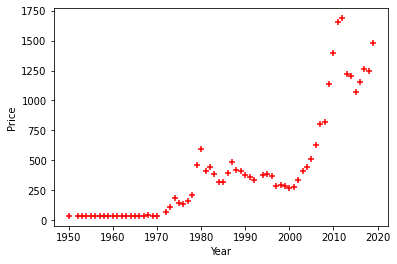

In [26]:
plt.xlabel('Year')
plt.ylabel('Price')
plt.scatter(df.Year,df.Price,color='red',marker='+')

In [27]:
new_df = df.drop('Price',axis='columns')
new_df

,Year
0,1950
2,1952
3,1953
4,1954
5,1955
...,...
65,2015
66,2016
67,2017
68,2018


In [29]:
price = df.Price
price

0       34.720
2       34.790
3       34.850
4       35.040
5       34.970
        ...   
65    1068.317
66    1152.165
67    1265.674
68    1249.887
69    1480.025
Name: Price, Length: 67, dtype: float64

In [35]:
x=df.loc[:,['Year']]
y=df.loc[:,['Price']]
print(x)
print(y)

    Year
0   1950
2   1952
3   1953
4   1954
5   1955
..   ...
65  2015
66  2016
67  2017
68  2018
69  2019

[67 rows x 1 columns]
       Price
0     34.720
2     34.790
3     34.850
4     35.040
5     34.970
..       ...
65  1068.317
66  1152.165
67  1265.674
68  1249.887
69  1480.025

[67 rows x 1 columns]


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [38]:
print(regressor.intercept_)

[-37873.45927027]


In [39]:
print(regressor.coef_)

[[19.30766041]]


In [48]:
y_pred=regressor.predict(x_test)
y_pred

array([[336.40067414],
       [915.63048633],
       [490.86195739],
       [452.24663658],
       [413.63131576],
       [761.16920308],
       [239.86237211],
       [645.32324064],
       [722.55388227],
       [317.09301373],
       [587.40025942],
       [857.70750511],
       [626.01558024],
       [896.32282593]])

In [46]:
task =pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
task

,Actual,Predicted
0,Price 29 463.666 59 1135.012 37 48...,"[[336.4006741388075], [915.6304863329424], [49..."


In [42]:
from sklearn import metrics
print('Mean absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error 189.81161655646386
Mean squared error 55290.03201636998
Root mean squared error 235.1383252818859


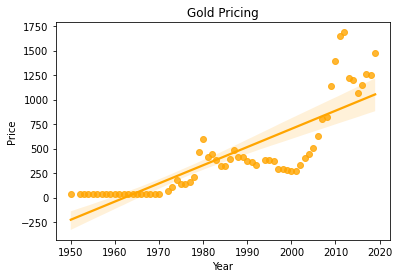

In [47]:
grp = sns.regplot(x='Year', y='Price', data=df, color='orange')
plt.title("Gold Pricing")
plt.show()

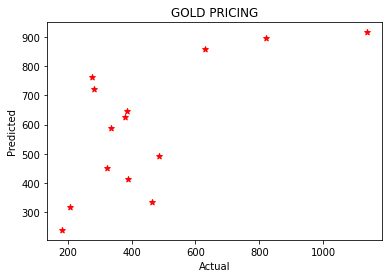

In [55]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('GOLD PRICING')
plt.scatter(y_test,y_pred,color='red',marker='*')